# Tutorial 10 homework

In this homework, you'll make a figure containing a scatter plot with marginal histograms similar to what we made earlier. Now, however, we have a few more tools at our disposal so we can probably make a better figure.

Here is some code to make a simulated data consisting of the scores on two tests (A and B) taken by 100 people.

In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy.stats import linregress

my_rng = np.random.default_rng(seed = 42)
test_a = my_rng.normal(100, 15, (100,1))
test_b = test_a + my_rng.normal(0, 10, test_a.shape)

Let's make a figure featuring a scatter plot of the scores against one another, along with two supporting panels showing the histograms of the two test scores.

An example figure would look something like this:

![hw example figure](images/hw10example.png)

But your goal isn't to make a figure that looks exactly like this; your goal is to make a figure that looks better than this!

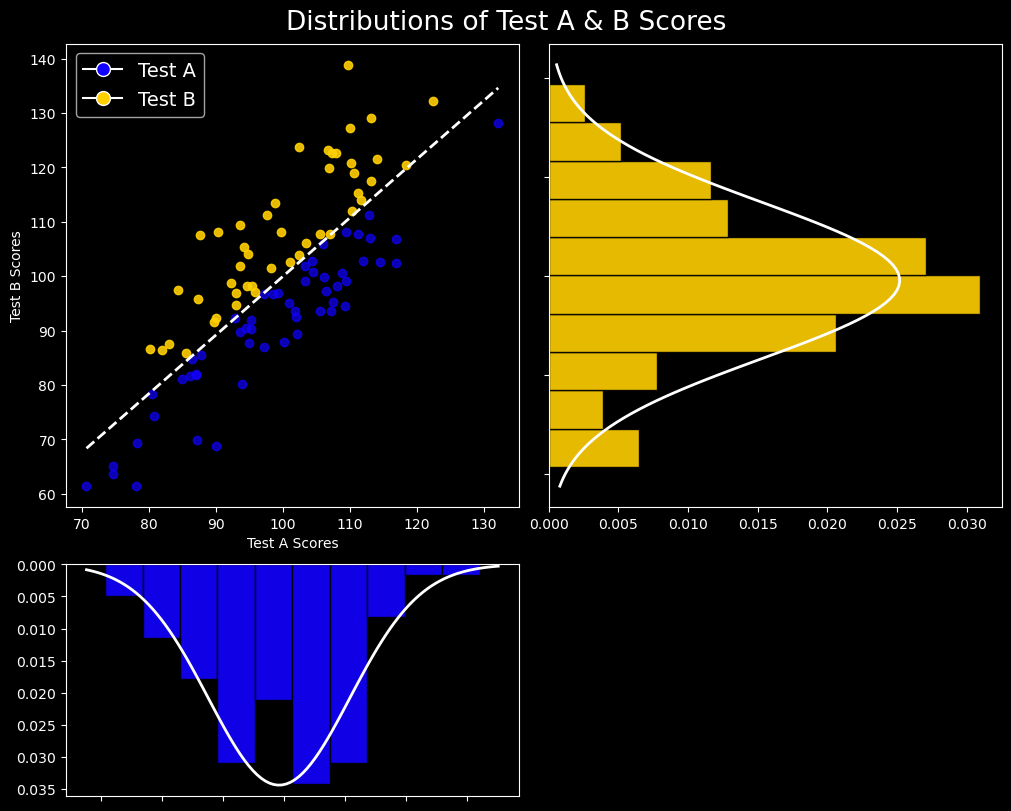

In [28]:
# dark background theme
plt.style.use('dark_background')

# create figure and axes using subplot_mosaic with adjusted height ratio
fig, axd = plt.subplot_mosaic([['scatter', 'hist_b'], ['hist_a', 'empty']],
                              figsize=(10, 8),  # Increased height
                              constrained_layout=True,
                              gridspec_kw={'height_ratios': [2, 1, ]})  # adjusted height ratio

# colors for Test A and Test B
color_a = '#1100ff'
color_b = '#ffd000'

# scatter plot for Test A > Test B
scatter_a_gt_b = axd['scatter'].scatter(test_a[test_a > test_b], test_b[test_a > test_b],
                                        color=color_a, label='Test A', alpha=0.7)

# scatter plot for Test A <= Test B
scatter_a_le_b = axd['scatter'].scatter(test_a[test_a <= test_b], test_b[test_a <= test_b],
                                        color=color_b, label='Test B', alpha=0.9)

# labels and title for scatter plot
axd['scatter'].set_xlabel("Test A Scores", color="white")
axd['scatter'].set_ylabel("Test B Scores", color="white")

# histograms for Test A and Test B
axd['hist_a'].hist(test_a, bins=10, edgecolor="black", color=color_a, alpha=0.9, orientation='vertical', density=True)

# fit a normal distribution to Test A data
mu_a, std_a = norm.fit(test_a)
xmin, xmax = axd['hist_a'].get_xlim()
x_a = np.linspace(xmin, xmax, 100)
p_a = norm.pdf(x_a, mu_a, std_a)
axd['hist_a'].plot(x_a, p_a, 'white', linewidth=2)  # Changed color to white

# set ticks to face downward
axd['hist_a'].invert_yaxis()
axd['hist_b'].hist(test_b, bins=10, edgecolor="black", color=color_b, alpha=0.9, orientation='horizontal', density=True)

# fit a normal distribution to Test B data
mu_b, std_b = norm.fit(test_b)
ymin, ymax = axd['hist_b'].get_ylim()
y_b = np.linspace(ymin, ymax, 100)
p_b = norm.pdf(y_b, mu_b, std_b)
axd['hist_b'].plot(p_b, y_b, 'white', linewidth=2)

# remove ticks and labels from empty subplot
axd['empty'].axis('off')

# remove x-axis labels for Test A histogram
axd['hist_a'].set_xticklabels([]) 


axd['hist_b'].set_yticklabels([]) 


# facecolor for individual subplots
for k in axd:
    axd[k].set_facecolor('black')

# legend with distinguished colors
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_a, markersize=10, label='Test A'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_b, markersize=10, label='Test B')]
axd['scatter'].legend(handles=handles, loc='upper left', fontsize=14)

# regression line to scatter plot
slope, intercept, r_value, p_value, std_err = linregress(test_a, test_b)
x_values = np.linspace(min(test_a), max(test_a), 100)
y_values = slope * x_values + intercept
axd['scatter'].plot(x_values, y_values, color='white', linestyle='--', linewidth=2)

# add suptitle
fig.suptitle('Distributions of Test A & B Scores', size=19, color='white')

plt.show()